<a href="https://colab.research.google.com/github/sawubona-repo/PRIVAT/blob/main/Python_OIL_PRICE_TIMESERIES_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil Price Time Series Analysis and Forecasting


---  
Data:
+ Weekly Oil Bulletin ([from European Commission](https://energy.ec.europa.eu/data-and-analysis/weekly-oil-bulletin_en))
+ Brent/WTi Crude Oil Spot Prices  ([from Datahub.io](https://datahub.io/core/oil-prices#resource-brent-week))
+ EUR/USD Echange Rate ([from Yahoo Finance](https://finance.yahoo.com/quote/EURUSD%3DX/history?period1=1104537600&period2=1688601600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true))
---  

Author:
+ dr. daniel benninger  

History:  
+ 2023-07-05 v1 dbe --- initial version   
---

## Load Libraries and Check Environment

In [43]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [44]:
print("pandas", pd.__version__)

pandas 1.5.3


In [ ]:
%ls
%cd sample_data

In [45]:
import warnings
warnings.filterwarnings("ignore")

## Load Data and Verify Structure/Format/Values

In [74]:
# load the oil price dataset from the github repository
path = 'https://github.com/sawubona-repo/PRIVAT/raw/main/Oil-Price-Timeseries/eu-oil-price.csv'
data = pd.read_csv(path, delimiter=',', decimal='.')

In [89]:
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num,Dlag_1,Drolling_mean4
0,2023-06-26,1724.62,1572.63,1053.04,699.13,538.56,708.63,NaN,NaN,2023,6,26,0,177,26,2,30,NaN,NaN
1,2023-06-19,1725.76,1555.44,1049.65,703.58,553.15,712.28,NaN,NaN,2023,6,19,0,170,25,2,30,1572.63,NaN
2,2023-06-12,1729.09,1552.28,1046.34,688.93,553.54,717.69,NaN,NaN,2023,6,12,0,163,24,2,30,1555.44,NaN
3,2023-06-05,1715.95,1539.89,1038.93,696.23,549.51,723.13,NaN,NaN,2023,6,5,0,156,23,2,30,1552.28,1555.060
4,2023-05-29,1719.03,1540.55,1048.49,697.58,544.09,723.61,NaN,NaN,2023,5,29,0,149,22,2,31,1539.89,1547.040
5,2023-05-22,1705.46,1535.32,1045.63,686.37,543.19,729.15,NaN,NaN,2023,5,22,0,142,21,2,31,1540.55,1542.010
6,2023-05-15,1703.43,1535.76,1043.86,688.42,512.07,735.16,NaN,NaN,2023,5,15,0,135,20,2,31,1535.32,1537.880
7,2023-05-08,1709.49,1550.23,1026.45,701.33,520.41,739.10,NaN,NaN,2023,5,8,0,128,19,2,31,1535.76,1540.465
8,2023-05-01,1732.90,1583.35,1034.12,708.54,558.59,738.61,NaN,NaN,2023,5,1,0,121,18,2,31,1550.23,1551.165
9,2023-04-24,1744.21,1612.36,1095.41,710.80,555.80,743.69,NaN,NaN,2023,4,24,0,114,17,2,30,1583.35,1570.425


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         916 non-null    object 
 1   Super95      916 non-null    float64
 2   Diesel       916 non-null    float64
 3   Heizoel      916 non-null    float64
 4   Heizoel-II   916 non-null    float64
 5   Heizoel-III  916 non-null    float64
 6   LPG          916 non-null    float64
dtypes: float64(6), object(1)
memory usage: 50.2+ KB


In [77]:
# convert date colume to "datetime" format
data[["Date"]] = data[["Date"]].apply(pd.to_datetime)

In [78]:
data.describe()

,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,1399.682806,1266.364520,805.299989,498.058319,398.807074,607.960186
std,186.122220,216.332723,211.215416,136.765623,112.970302,91.647353
min,998.210000,899.680000,479.920000,244.070000,169.950000,445.710000
25%,1267.432500,1101.107500,652.287500,384.195000,307.350000,538.197500
50%,1374.500000,1246.800000,763.270000,481.560000,381.950000,585.015000
75%,1526.072500,1383.490000,919.037500,614.730000,480.830000,682.067500
max,2035.900000,2035.240000,1728.020000,858.170000,730.960000,861.350000


In [90]:
data.sort_values(by='Date', inplace=True)
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num,Dlag_1,Drolling_mean4
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75,918.432500,949.455417,2005,1,3,0,3,1,1,31,901.38,902.7225
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16,923.653333,954.112917,2005,1,10,0,10,2,1,31,899.68,902.8575
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66,931.330833,959.396250,2005,1,17,0,17,3,1,31,900.77,904.3300
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56,938.613333,965.275833,2005,1,24,0,24,4,1,31,909.60,905.2825
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16,945.568333,970.985833,2005,1,31,0,31,5,1,31,907.27,906.7625
910,2005-02-07,1055.29,907.27,497.52,262.91,191.08,491.14,951.580000,976.108750,2005,2,7,0,38,6,1,28,903.49,910.3100
909,2005-02-14,1050.71,903.49,497.08,260.46,197.77,489.45,957.140000,981.240833,2005,2,14,0,45,7,1,28,906.69,918.8275
908,2005-02-21,1053.09,906.69,501.93,261.44,197.32,481.76,962.255833,986.662083,2005,2,21,0,52,8,1,28,923.79,931.9975
907,2005-02-28,1058.98,923.79,526.72,269.18,201.57,484.73,966.571667,992.107500,2005,2,28,0,59,9,1,28,941.34,945.8125
906,2005-03-07,1067.73,941.34,553.90,274.74,205.71,486.66,969.362500,997.727917,2005,3,7,0,66,10,1,31,956.17,957.7925


---
## Select time range and plot time series
Select a specific timeframe

In [ ]:
# dataS= data[(data['Date'] > "2019-01-01") & (data['Date'] < "2023-01-01")]
# dataS= data[(data['Date'] > "2018-01-01")]

In [79]:
# select selected variables
dataX = data
dataX = data[['Date', 'Super95','Diesel']]
dataX.head(10)

,Date,Super95,Diesel
0,2023-06-26,1724.62,1572.63
1,2023-06-19,1725.76,1555.44
2,2023-06-12,1729.09,1552.28
3,2023-06-05,1715.95,1539.89
4,2023-05-29,1719.03,1540.55
5,2023-05-22,1705.46,1535.32
6,2023-05-15,1703.43,1535.76
7,2023-05-08,1709.49,1550.23
8,2023-05-01,1732.90,1583.35
9,2023-04-24,1744.21,1612.36


and plot the time series as **line graphs** using *plotly.express*

In [96]:
import plotly.express as px
df = dataX

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Super95', 'Diesel'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

ValueError: ignored

In [97]:
# add rolling means
data['rolling_meanA'] = data['Diesel'].rolling(window=12).mean()
data['rolling_meanB'] = data['Diesel'].rolling(window=24).mean()

In [98]:
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num,Dlag_1,Drolling_mean4
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75,NaN,NaN,2005,1,3,0,3,1,1,31,NaN,NaN
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16,NaN,NaN,2005,1,10,0,10,2,1,31,909.06,NaN
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66,NaN,NaN,2005,1,17,0,17,3,1,31,901.38,NaN
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56,NaN,NaN,2005,1,24,0,24,4,1,31,899.68,902.7225
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16,NaN,NaN,2005,1,31,0,31,5,1,31,900.77,902.8575
910,2005-02-07,1055.29,907.27,497.52,262.91,191.08,491.14,NaN,NaN,2005,2,7,0,38,6,1,28,909.60,904.3300
909,2005-02-14,1050.71,903.49,497.08,260.46,197.77,489.45,NaN,NaN,2005,2,14,0,45,7,1,28,907.27,905.2825
908,2005-02-21,1053.09,906.69,501.93,261.44,197.32,481.76,NaN,NaN,2005,2,21,0,52,8,1,28,903.49,906.7625
907,2005-02-28,1058.98,923.79,526.72,269.18,201.57,484.73,NaN,NaN,2005,2,28,0,59,9,1,28,906.69,910.3100
906,2005-03-07,1067.73,941.34,553.90,274.74,205.71,486.66,NaN,NaN,2005,3,7,0,66,10,1,31,923.79,918.8275


In [102]:
dataY = data[['Date', 'Diesel','rolling_meanA','rolling_meanB']]
#df = dataY
df= dataY[(dataY['Date'] > "2006-01-01") & (dataY['Date'] < "2022-12-31")]

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel','rolling_meanA','rolling_meanB'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup><br><sup>with Rolling Means</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

## Some Feature Engineering Techniques applied to Time Series Data

### **Date-Related** Features   
Information about the day, month, year e.g. *day of the week*, *quarter*, *day/week of year* etc.

In [84]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

data['dayofweek_num']=data['Date'].dt.dayofweek
data['dayofyear_num']=data['Date'].dt.dayofyear
data['weekofyear_num']=data['Date'].dt.week
data['quarter_num']=data['Date'].dt.quarter
data['daysinmonth_num']=data['Date'].dt.days_in_month

data.head()

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num
0,2023-06-26,1724.62,1572.63,1053.04,699.13,538.56,708.63,NaN,NaN,2023,6,26,0,177,26,2,30
1,2023-06-19,1725.76,1555.44,1049.65,703.58,553.15,712.28,NaN,NaN,2023,6,19,0,170,25,2,30
2,2023-06-12,1729.09,1552.28,1046.34,688.93,553.54,717.69,NaN,NaN,2023,6,12,0,163,24,2,30
3,2023-06-05,1715.95,1539.89,1038.93,696.23,549.51,723.13,NaN,NaN,2023,6,5,0,156,23,2,30
4,2023-05-29,1719.03,1540.55,1048.49,697.58,544.09,723.61,NaN,NaN,2023,5,29,0,149,22,2,31


---  
### **Lag-Related** Features  
If we like predicting the future price. So, the previous day’s price is important to make a prediction. In other words, the value at time t is greatly affected by the value at time t-1. The past values are known as lags, so t-1 is lag 1, t-2 is lag 2, and so on.

In [103]:
data['Dlag_1'] = data['Diesel'].shift(1)

dataX = data[['Date', 'Dlag_1', 'Diesel']]
dataX.head()

,Date,Dlag_1,Diesel
915,2005-01-03,NaN,909.06
914,2005-01-10,909.06,901.38
913,2005-01-17,901.38,899.68
912,2005-01-24,899.68,900.77
911,2005-01-31,900.77,909.60


In [104]:
dataX['Dperformance_1']=dataX['Diesel']-dataX['Dlag_1']

dataX.head()

,Date,Dlag_1,Diesel,Dperformance_1
915,2005-01-03,NaN,909.06,NaN
914,2005-01-10,909.06,901.38,-7.68
913,2005-01-17,901.38,899.68,-1.70
912,2005-01-24,899.68,900.77,1.09
911,2005-01-31,900.77,909.60,8.83


In [112]:
df= dataX[(dataX['Date'] > "2020-01-01") & (dataY['Date'] < "2022-12-31")]

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Dperformance_1'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>Weekly Performance</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (-100,100))

# Display the plot
fig.show()

If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, we should create lag features for seven days.

We can create multiple lag features as well! Let’s say we want lag 1 to lag 7 – we can let the model decide which is the most valuable one. So, if we train a linear regression model, it will assign appropriate weights (or coefficients) to the lag features

In [ ]:
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)
data['lag_6'] = data['Close'].shift(6)
data['lag_7'] = data['Close'].shift(7)

dataX = data[['Date', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Close']]
dataX.head(10)

,Date,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Close
0,2009-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.703125
1,2009-04-07,30.703125,NaN,NaN,NaN,NaN,NaN,NaN,29.482422
2,2009-04-08,29.482422,30.703125,NaN,NaN,NaN,NaN,NaN,30.644531
3,2009-04-09,30.644531,29.482422,30.703125,NaN,NaN,NaN,NaN,32.841797
4,2009-04-13,32.841797,30.644531,29.482422,30.703125,NaN,NaN,NaN,33.974609
5,2009-04-14,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,NaN,31.689453
6,2009-04-15,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,32.910156
7,2009-04-16,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,35.087891
8,2009-04-17,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,33.300781
9,2009-04-20,33.300781,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,30.361328


---  
### **Rolling Window** Features  
How about calculating some statistical values based on past values? This method is called the rolling window method because the window would be different for every data point.  

We will select a window size, take the average of the values in the window, and use it as a feature.

In [93]:
# calcualting rolling mean for a window of 4 weeks
data['Drolling_mean4'] = data['Diesel'].rolling(window=4).mean()

dataX = data[['Date', 'Drolling_mean4', 'Diesel']]
dataX.head(10)

,Date,Drolling_mean4,Diesel
915,2005-01-03,NaN,909.06
914,2005-01-10,NaN,901.38
913,2005-01-17,NaN,899.68
912,2005-01-24,902.7225,900.77
911,2005-01-31,902.8575,909.60
910,2005-02-07,904.3300,907.27
909,2005-02-14,905.2825,903.49
908,2005-02-21,906.7625,906.69
907,2005-02-28,910.3100,923.79
906,2005-03-07,918.8275,941.34


In [94]:
import plotly.express as px
df= dataX[(dataX['Date'] > "2010-01-01") & (dataX['Date'] < "2019-12-31")]
#df.info()

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel', 'Drolling_mean4'])


# Setup Layout
fig.update_layout(
   title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup><br><sup>with Rolling Means</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

---  
### **Differencing** Time Series
Differencing is a method of transforming a time series dataset. Differencing is performed by subtracting the previous observation from the current observation.  

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

In [113]:
dataZ = data[['Date', 'Diesel']]
dataZ['Ddiff1'] = dataZ['Diesel'].diff(periods=1)

dataZ.head()

,Date,Diesel,Ddiff1
915,2005-01-03,909.06,NaN
914,2005-01-10,901.38,-7.68
913,2005-01-17,899.68,-1.70
912,2005-01-24,900.77,1.09
911,2005-01-31,909.60,8.83


In [114]:
dataZ['Ddiff4'] = dataZ['Diesel'].diff(periods=4)
dataZ['Ddiff12'] = dataZ['Diesel'].diff(periods=12)

dataZ.head(10)

,Date,Diesel,Ddiff1,Ddiff4,Ddiff12
915,2005-01-03,909.06,NaN,NaN,NaN
914,2005-01-10,901.38,-7.68,NaN,NaN
913,2005-01-17,899.68,-1.70,NaN,NaN
912,2005-01-24,900.77,1.09,NaN,NaN
911,2005-01-31,909.60,8.83,0.54,NaN
910,2005-02-07,907.27,-2.33,5.89,NaN
909,2005-02-14,903.49,-3.78,3.81,NaN
908,2005-02-21,906.69,3.20,5.92,NaN
907,2005-02-28,923.79,17.10,14.19,NaN
906,2005-03-07,941.34,17.55,34.07,NaN


In [116]:
import plotly.express as px
df= dataZ[(dataZ['Date'] > "2019-01-01") & (dataZ['Date'] < "2022-12-31")]

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel', 'Ddiff1','Ddiff4','Ddiff12'])


# Setup Layout
fig.update_layout(
   title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup><br><sup>with Differences</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (-500,500))

# Display the plot
fig.show()

---  
### **ADD ON:** Line or Bar Charts for Time Series?


In [117]:
dataZ = data[['Date', 'Diesel']]
dataZ.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 915 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    916 non-null    datetime64[ns]
 1   Diesel  916 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.5 KB


,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num,Dlag_1,Drolling_mean4
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75,NaN,NaN,2005,1,3,0,3,1,1,31,NaN,NaN
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16,NaN,NaN,2005,1,10,0,10,2,1,31,909.06,NaN
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66,NaN,NaN,2005,1,17,0,17,3,1,31,901.38,NaN
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56,NaN,NaN,2005,1,24,0,24,4,1,31,899.68,902.7225
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16,NaN,NaN,2005,1,31,0,31,5,1,31,900.77,902.8575


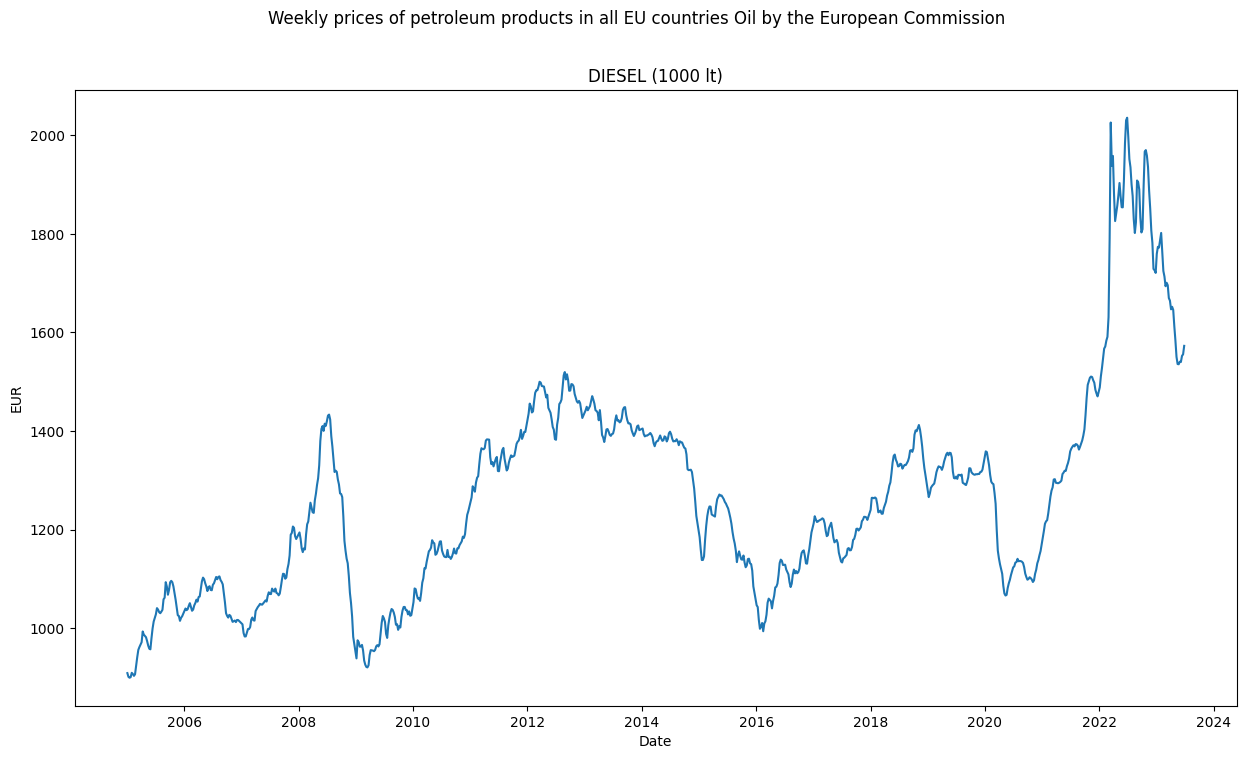

In [125]:
import matplotlib.pyplot as plt

dataZ = data[['Date', 'Diesel']]

plt.figure(figsize=(15, 8))
# as LINE chart
plt.plot(dataZ.Date, dataZ.Diesel)

# as BAR chart
# plt.bar(dataZ.Date, dataZ.Diesel)

plt.suptitle("Weekly prices of petroleum products in all EU countries Oil by the European Commission")
plt.title("DIESEL (1000 lt)")
plt.xlabel('Date')
plt.ylabel('EUR')

plt.show()

---   
### **ADD ON:** Visualizing time series data in [Heatmap](https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/) form


In [ ]:
!pip install calplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8119 sha256=2a8549155e8c0f744454f0771a6165add111b1ad97d2cd1b4083b9e3042b883a
  Stored in directory: /root/.cache/pip/wheels/a4/51/68/89dbd39aa6abbe8e34f410a810421335b157fb162b99841c30
Successfully built calplot


In [137]:
dataZ = data[['Date','Diesel']]
df= dataZ[(dataZ['Date'] > "2018-01-01") & (dataZ['Date'] < "2022-01-01")]
df.head()

,Date,Diesel
273,2018-01-08,1264.44
272,2018-01-15,1264.41
271,2018-01-22,1263.59
270,2018-01-29,1265.16
269,2018-02-05,1263.23


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 669 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    593 non-null    datetime64[ns]
 1   Diesel  593 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.9 KB


In [138]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2018-01-08 to 2021-12-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Diesel  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [130]:
!pip install calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8119 sha256=0becbadeb54f031300680f819bc40252cb0568277f544487f768e8991a228e5b
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot


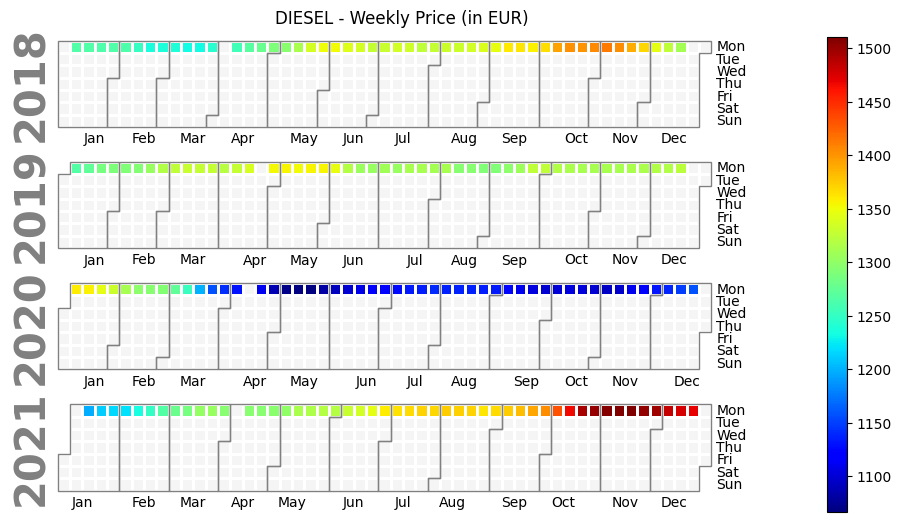

In [139]:
import calplot
fig1 = calplot.calplot(data = df['Diesel'],
                       cmap = 'jet',
                       figsize = (10, 5),
                       suptitle = "DIESEL - Weekly Price (in EUR)",
                       )

import pylab
pylab.savefig('diesel-heatmap.png')



---



---  
### **ADD ON:** Systematic Feature Engineering with [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/introduction.html)  
**tsfresh** is used for systematic feature engineering from time-series and other sequential data. These data have in common that they are ordered by an independent variable. The most common independent variable is time (time series).  
If we want to calculate different characteristics of time series such as the maximum or minimum, the average or the number of temporary peaks, without tsfresh, we have to calculate all those characteristics manually.  
tsfresh automates this process calculating and returning all those features automatically.

In [ ]:
!pip install -U tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
dataZ = data[['Date','Open','High','Low','Close','Volume','year','month','day']]
dataZ.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2009-04-06,29.658203,30.937500,29.541016,30.703125,3253043,2009,4,6
1,2009-04-07,29.482422,29.960938,29.072266,29.482422,1795584,2009,4,7
2,2009-04-08,30.361328,30.908203,29.746094,30.644531,1202688,2009,4,8
3,2009-04-09,31.240234,33.027344,31.025391,32.841797,2358579,2009,4,9
4,2009-04-13,32.470703,34.423828,32.285156,33.974609,1897062,2009,4,13


In [ ]:
# settings for feature extraction
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
# e.g.
kind_to_fc_parameters = {
    "Open": {"mean": None},
    "Close": {"maximum": None, "minimum": None}
}

# automated feature extraction
from tsfresh.feature_extraction import extract_features
features = extract_features(dataZ, column_id="Date", column_sort="Date", default_fc_parameters=settings)

#features = extract_features(dataZ, column_id="Date", column_sort="Date")

Feature Extraction:   8%|▊         | 2145/28192 [01:13<14:50, 29.26it/s]


KeyboardInterrupt: ignored

In [ ]:
features.info()

In [ ]:
features.head()

In [ ]:
features.describe()